In [1]:
import matplotlib.pyplot as plt
import numpy as np

from numpy.lib.stride_tricks import sliding_window_view

from sai.stats.scct_feature import *


import allel
import os

In [2]:

vcf_chr9 = os.path.join("examples", "data", "1KG.nea_den.chr9.example.vcf.gz")
ref_ind_file = os.path.join("examples", "data", "1KG.ref.samples.txt")
tgt_ind_file = os.path.join("examples", "data", "1KG.tgt.samples.txt")
src_ind_file = os.path.join("examples", "data", "1KG.src.samples.txt")


In [3]:
vcf_file_allel = allel.read_vcf(vcf_chr9)

In [4]:
genotypes = vcf_file_allel['calldata/GT']
genotype_array = allel.GenotypeArray(genotypes)


In [5]:
anc_allele_file = None
win_len = 50000
win_step = 50000
chr_name = "9"
vcf_file = vcf_chr9
ploidy = 2

In [6]:
is_phased = False

In [7]:
full_vcf = load_full_vcf(vcf_file, "9", ref_ind_file, tgt_ind_file, src_ind_file=src_ind_file, ploidy=2,is_phased = False)
full_vcf_tgt_gts = full_vcf[2]
full_vcf_positions = full_vcf[-1]

In [8]:
full_vcf_gts_filtered, full_indices_filtered = filter_zero_rows(full_vcf_tgt_gts, return_indices=True)

full_vcf_pos_filtered = np.delete(full_vcf_positions, full_indices_filtered, axis=0)

In [9]:
full_vcf_gts_filtered.shape

(3212, 503)

# All results show phased data, evaluation of SNP-windows

## Unstandardized results (alpha set to 1)

Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and th

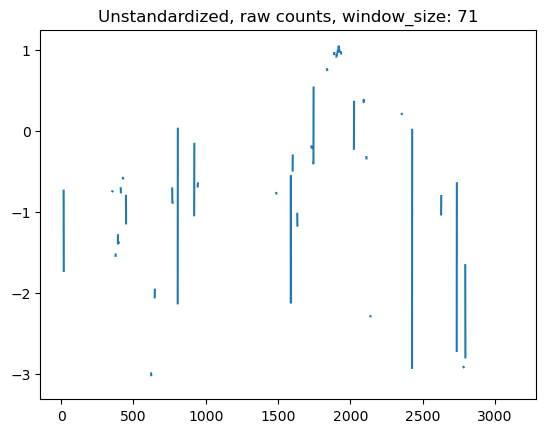

Text(0.5, 1.0, 'Unstandardized, raw counts, window_size: 71, smoothed average with window_size 100')

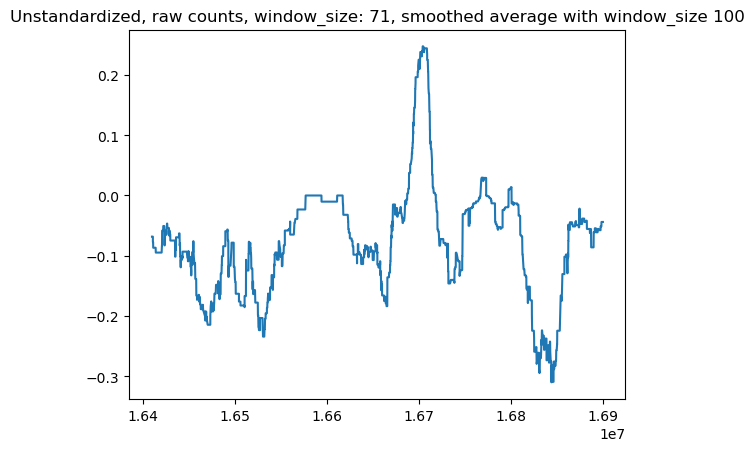

In [10]:
snp_window_size = 71    
snp_slides = sliding_window_view(full_vcf_gts_filtered, window_shape=(snp_window_size, full_vcf_gts_filtered.shape[1]))
pos_slides = sliding_window_view(full_vcf_pos_filtered, window_shape=(snp_window_size))

unst_results = []
for i in range(len(snp_slides)):
    snp_window = snp_slides[i][0]
    pos_window = pos_slides[i]
    result = sample_scct(snp_window, central_snp=None, theoretical=False, is_phased = False, use_log_ratio=False, gts_pos=pos_window, full_vcf_gts=full_vcf_gts_filtered, full_vcf_pos=full_vcf_pos_filtered, set_alpha_1=True)   
    unst_results.append(result)
	
	
plt.plot(unst_results)
plt.title(f"Unstandardized, raw counts, window_size: {snp_window_size}")
plt.show()

smooth_window_size = 100
smoothed_unst = smooth_average(unst_results, window_size=smooth_window_size)
plt.plot(full_vcf_pos_filtered[snp_window_size-1:], smoothed_unst)
plt.title(f"Unstandardized, raw counts, window_size: {snp_window_size}, smoothed average with window_size {smooth_window_size}")

Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and th

/home/jalh/Desktop/sai_sim/sai/stats/scct_feature.py:240: RuntimeWarning: invalid value encountered in log
  lor = np.log(f11) + np.log(f00) - np.log(f10) - np.log(f01)
/home/jalh/Desktop/sai_sim/sai/stats/scct_feature.py:447: RuntimeWarning: divide by zero encountered in log
  S = np.log(sum_D / (ratio_alpha * sum_C))


Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and th

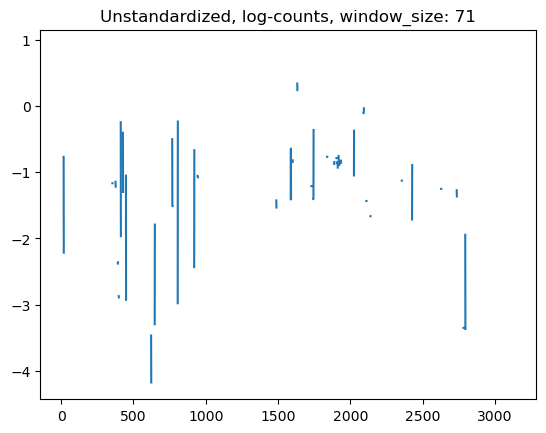

Text(0.5, 1.0, 'Unstandardized, log-counts, window_size: 71, smoothed average with window_size 100')

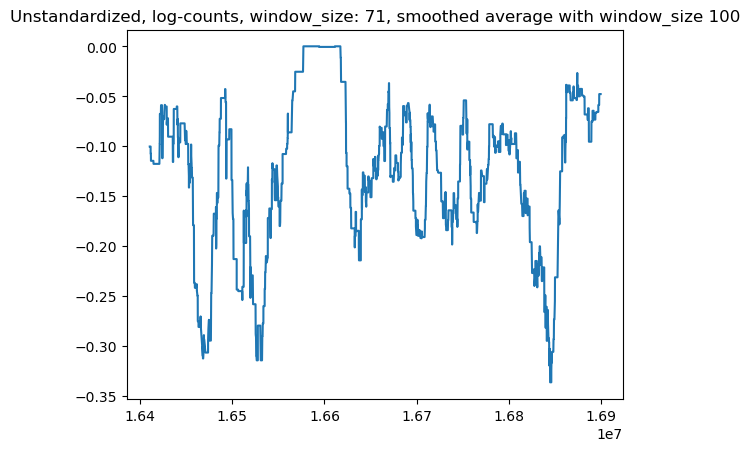

In [11]:
snp_window_size = 71    
snp_slides = sliding_window_view(full_vcf_gts_filtered, window_shape=(snp_window_size, full_vcf_gts_filtered.shape[1]))
pos_slides = sliding_window_view(full_vcf_pos_filtered, window_shape=(snp_window_size))

unst_results = []
for i in range(len(snp_slides)):
    snp_window = snp_slides[i][0]
    pos_window = pos_slides[i]
    result = sample_scct(snp_window, central_snp=None, theoretical=False, is_phased = False, use_log_ratio=True, gts_pos=pos_window, full_vcf_gts=full_vcf_gts_filtered, full_vcf_pos=full_vcf_pos_filtered, set_alpha_1=True)   
    unst_results.append(result)
	
	
plt.plot(unst_results)
plt.title(f"Unstandardized, log-counts, window_size: {snp_window_size}")
plt.show()

smooth_window_size = 100
smoothed_unst = smooth_average(unst_results, window_size=smooth_window_size)
plt.plot(full_vcf_pos_filtered[snp_window_size-1:], smoothed_unst)
plt.title(f"Unstandardized, log-counts, window_size: {snp_window_size}, smoothed average with window_size {smooth_window_size}")

Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and th

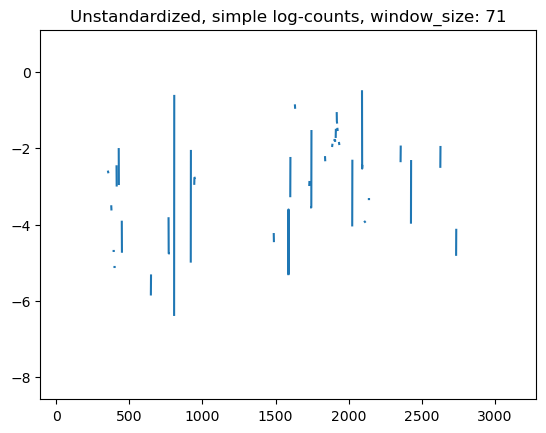

Text(0.5, 1.0, 'Unstandardized, simple log-counts, window_size: 71, smoothed average with window_size 100')

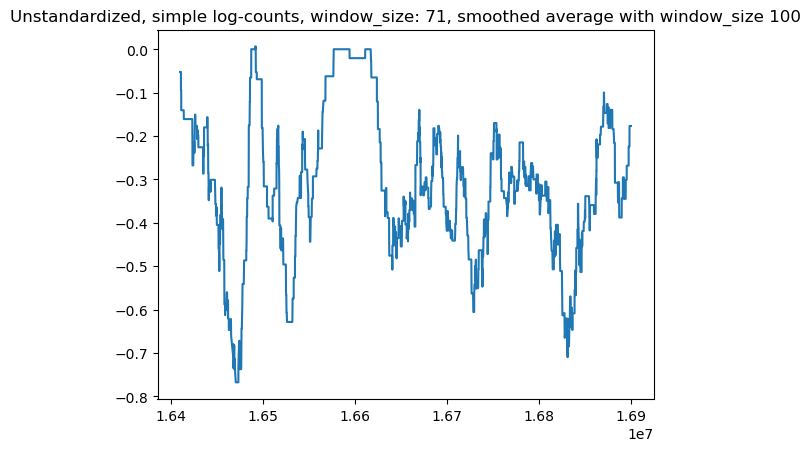

In [12]:
snp_window_size = 71    
snp_slides = sliding_window_view(full_vcf_gts_filtered, window_shape=(snp_window_size, full_vcf_gts_filtered.shape[1]))
pos_slides = sliding_window_view(full_vcf_pos_filtered, window_shape=(snp_window_size))

unst_results = []
for i in range(len(snp_slides)):
    snp_window = snp_slides[i][0]
    pos_window = pos_slides[i]
    result = sample_scct(snp_window, central_snp=None, theoretical=False, is_phased = False, use_log_ratio=True, gts_pos=pos_window, full_vcf_gts=full_vcf_gts_filtered, full_vcf_pos=full_vcf_pos_filtered, simple_log_ratio=True, set_alpha_1=True)   
    unst_results.append(result)
	
	
plt.plot(unst_results)
plt.title(f"Unstandardized, simple log-counts, window_size: {snp_window_size}")
plt.show()

smooth_window_size = 100
smoothed_unst = smooth_average(unst_results, window_size=smooth_window_size)
plt.plot(full_vcf_pos_filtered[snp_window_size-1:], smoothed_unst)
plt.title(f"Unstandardized, simple log-counts, window_size: {snp_window_size}, smoothed average with window_size {smooth_window_size}")

## Theoretical alpha results

Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and th

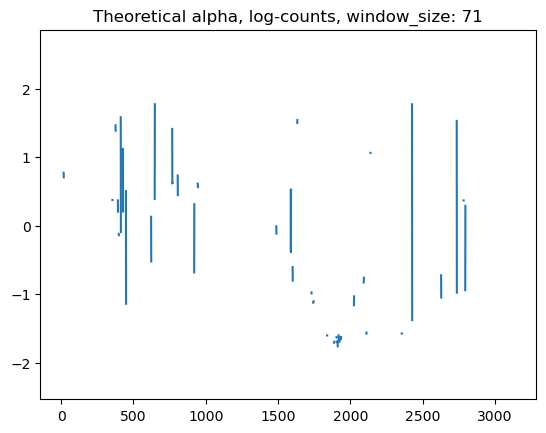

Text(0.5, 1.0, 'Theoretical alpha, log-counts, window_size: 71, smoothed average with window_size 100')

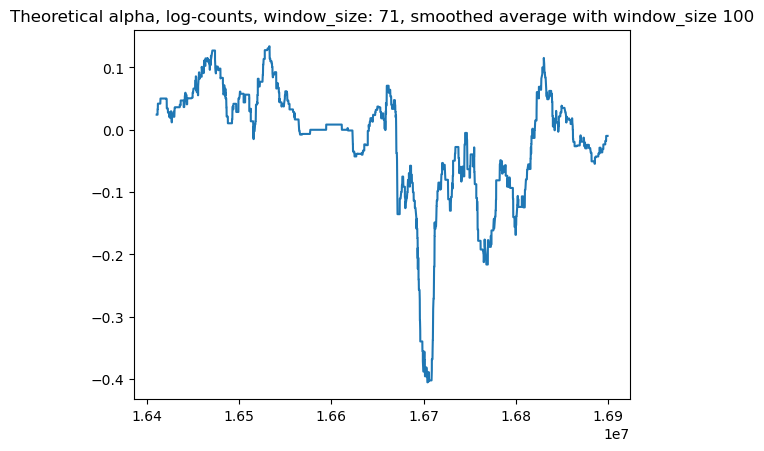

In [13]:
snp_window_size = 71    
snp_slides = sliding_window_view(full_vcf_gts_filtered, window_shape=(snp_window_size, full_vcf_gts_filtered.shape[1]))
pos_slides = sliding_window_view(full_vcf_pos_filtered, window_shape=(snp_window_size))

theoretical_results = []
for i in range(len(snp_slides)):
    snp_window = snp_slides[i][0]
    pos_window = pos_slides[i]
    result = sample_scct(snp_window, central_snp=None, theoretical=True, is_phased = False, use_log_ratio=True, gts_pos=pos_window, full_vcf_gts=full_vcf_gts_filtered, full_vcf_pos=full_vcf_pos_filtered, set_alpha_1=False)   
    theoretical_results.append(result)
	
	
plt.plot(theoretical_results)
plt.title(f"Theoretical alpha, log-counts, window_size: {snp_window_size}")
plt.show()

smooth_window_size = 100
smoothed_theoretical = smooth_average(theoretical_results, window_size=smooth_window_size)
plt.plot(full_vcf_pos_filtered[snp_window_size-1:], smoothed_theoretical)
plt.title(f"Theoretical alpha, log-counts, window_size: {snp_window_size}, smoothed average with window_size {smooth_window_size}")

Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and th

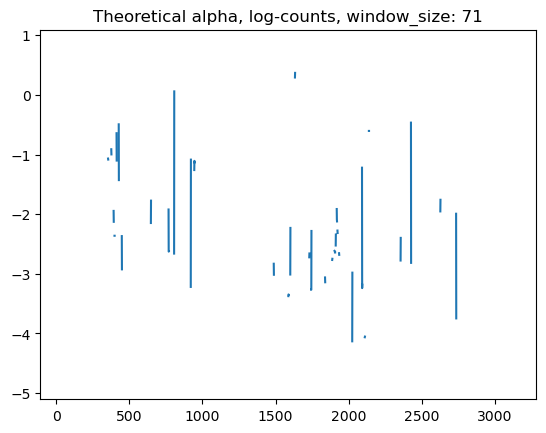

Text(0.5, 1.0, 'Theoretical alpha, simple log-counts, window_size: 71, smoothed average with window_size 100')

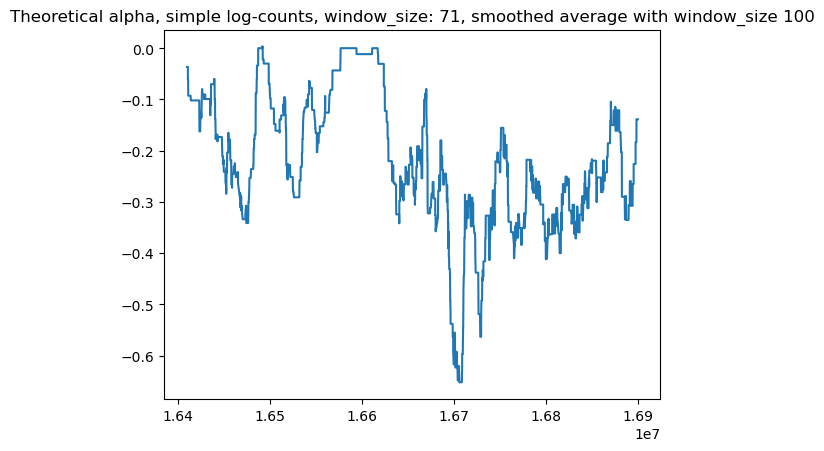

In [14]:
snp_window_size = 71    
snp_slides = sliding_window_view(full_vcf_gts_filtered, window_shape=(snp_window_size, full_vcf_gts_filtered.shape[1]))
pos_slides = sliding_window_view(full_vcf_pos_filtered, window_shape=(snp_window_size))

theoretical_results = []
for i in range(len(snp_slides)):
    snp_window = snp_slides[i][0]
    pos_window = pos_slides[i]
    result = sample_scct(snp_window, central_snp=None, theoretical=True, is_phased = False, use_log_ratio=True, gts_pos=pos_window, full_vcf_gts=full_vcf_gts_filtered, full_vcf_pos=full_vcf_pos_filtered, simple_log_ratio=True, set_alpha_1=False)   
    theoretical_results.append(result)
	
	
plt.plot(theoretical_results)
plt.title(f"Theoretical alpha, log-counts, window_size: {snp_window_size}")
plt.show()

smooth_window_size = 100
smoothed_theoretical = smooth_average(theoretical_results, window_size=smooth_window_size)
plt.plot(full_vcf_pos_filtered[snp_window_size-1:], smoothed_theoretical)
plt.title(f"Theoretical alpha, simple log-counts, window_size: {snp_window_size}, smoothed average with window_size {smooth_window_size}")

Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and th

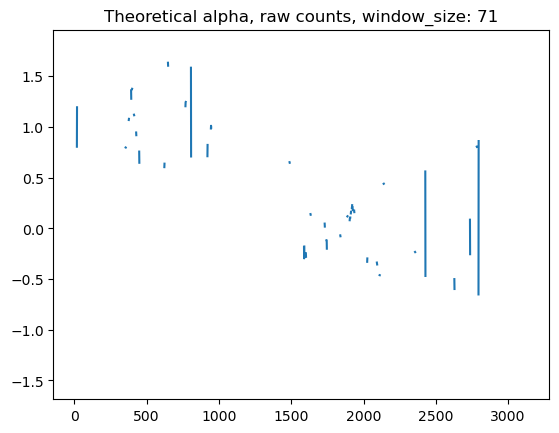

Text(0.5, 1.0, 'Theoretical alpha, raw counts, window_size: 71, smoothed average with window_size 100')

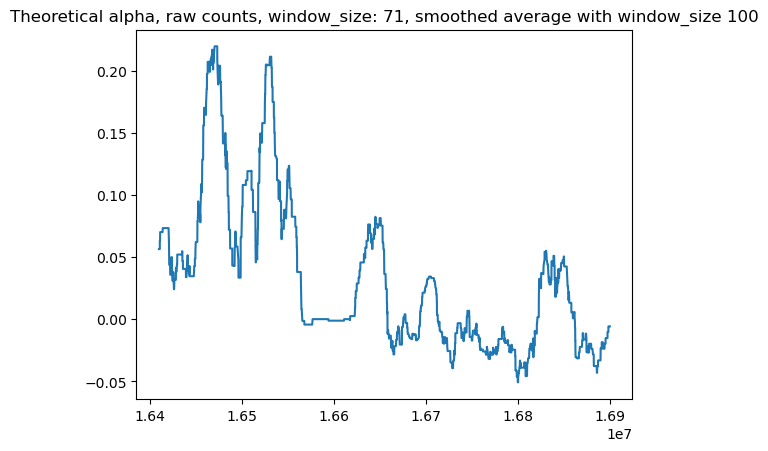

In [15]:
snp_window_size = 71    
snp_slides = sliding_window_view(full_vcf_gts_filtered, window_shape=(snp_window_size, full_vcf_gts_filtered.shape[1]))
pos_slides = sliding_window_view(full_vcf_pos_filtered, window_shape=(snp_window_size))

theoretical_results = []
for i in range(len(snp_slides)):
    snp_window = snp_slides[i][0]
    pos_window = pos_slides[i]
    result = sample_scct(snp_window, central_snp=None, theoretical=True, is_phased = False, use_log_ratio=False, gts_pos=pos_window, full_vcf_gts=full_vcf_gts_filtered, full_vcf_pos=full_vcf_pos_filtered, set_alpha_1=False)   
    theoretical_results.append(result)
	
	
plt.plot(theoretical_results)
plt.title(f"Theoretical alpha, raw counts, window_size: {snp_window_size}")
plt.show()

smooth_window_size = 100
smoothed_theoretical = smooth_average(theoretical_results, window_size=smooth_window_size)
plt.plot(full_vcf_pos_filtered[snp_window_size-1:], smoothed_theoretical)
plt.title(f"Theoretical alpha, raw counts, window_size: {snp_window_size}, smoothed average with window_size {smooth_window_size}")

## Empirical alpha results

Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and th

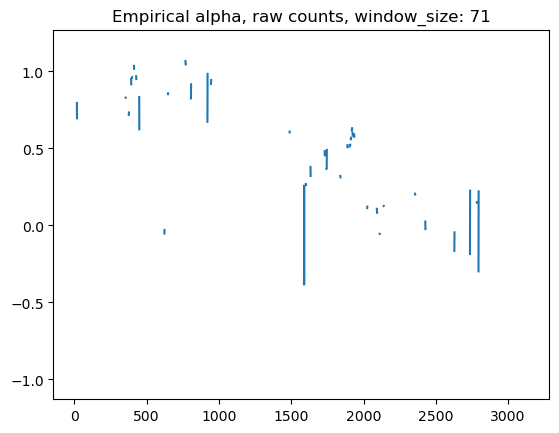

Text(0.5, 1.0, 'Empirical alpha, raw counts, window_size: 71, smoothed average with window_size 100')

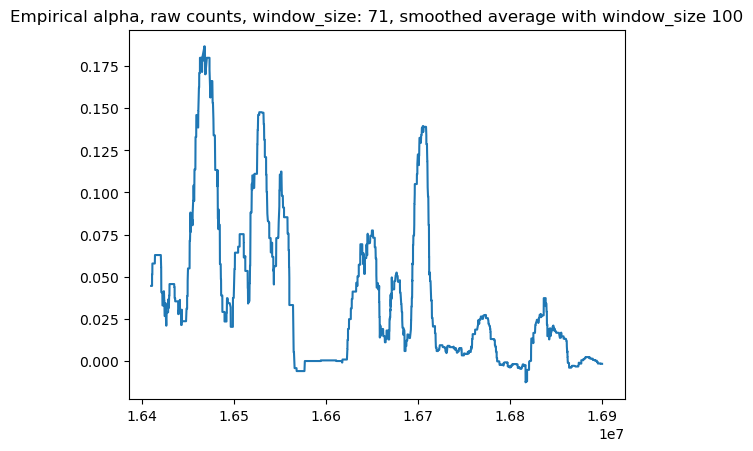

In [16]:
snp_window_size = 71    
snp_slides = sliding_window_view(full_vcf_gts_filtered, window_shape=(snp_window_size, full_vcf_gts_filtered.shape[1]))
pos_slides = sliding_window_view(full_vcf_pos_filtered, window_shape=(snp_window_size))

empirical_results = []
for i in range(len(snp_slides)):
    snp_window = snp_slides[i][0]
    pos_window = pos_slides[i]
    result = sample_scct(snp_window, central_snp=None, theoretical=False, is_phased = False, use_log_ratio=False, gts_pos=pos_window, full_vcf_gts=full_vcf_gts_filtered, full_vcf_pos=full_vcf_pos_filtered, set_alpha_1=False)   
    empirical_results.append(result)
	
	
plt.plot(empirical_results)
plt.title(f"Empirical alpha, raw counts, window_size: {snp_window_size}")
plt.show()

smooth_window_size = 100
smoothed_empirical = smooth_average(empirical_results, window_size=smooth_window_size)
plt.plot(full_vcf_pos_filtered[snp_window_size-1:], smoothed_empirical)
plt.title(f"Empirical alpha, raw counts, window_size: {snp_window_size}, smoothed average with window_size {smooth_window_size}")

Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and th

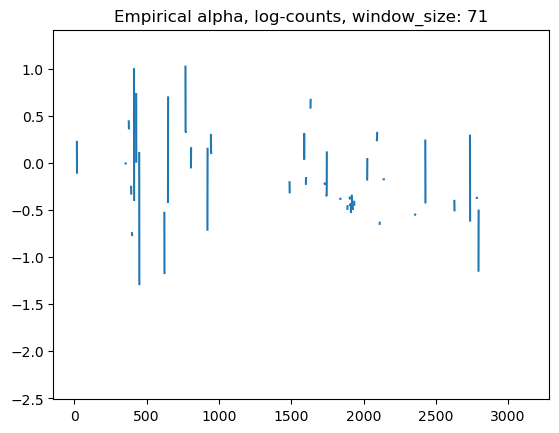

Text(0.5, 1.0, 'Empirical alpha, log-counts, window_size: 71, smoothed average with window_size 100')

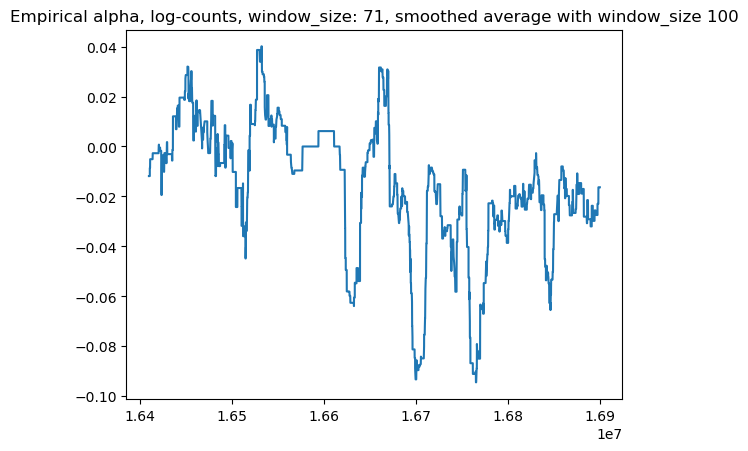

In [17]:
snp_window_size = 71    
snp_slides = sliding_window_view(full_vcf_gts_filtered, window_shape=(snp_window_size, full_vcf_gts_filtered.shape[1]))
pos_slides = sliding_window_view(full_vcf_pos_filtered, window_shape=(snp_window_size))

empirical_results = []
for i in range(len(snp_slides)):
    snp_window = snp_slides[i][0]
    pos_window = pos_slides[i]
    result = sample_scct(snp_window, central_snp=None, theoretical=False, is_phased = False, use_log_ratio=True, gts_pos=pos_window, full_vcf_gts=full_vcf_gts_filtered, full_vcf_pos=full_vcf_pos_filtered, set_alpha_1=False)   
    empirical_results.append(result)
	
	
plt.plot(empirical_results)
plt.title(f"Empirical alpha, log-counts, window_size: {snp_window_size}")
plt.show()

smooth_window_size = 100
smoothed_empirical = smooth_average(empirical_results, window_size=smooth_window_size)
plt.plot(full_vcf_pos_filtered[snp_window_size-1:], smoothed_empirical)
plt.title(f"Empirical alpha, log-counts, window_size: {snp_window_size}, smoothed average with window_size {smooth_window_size}")

Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and there are no homozygous haplotypes with the derived allele present at the central SNP, return nan
Error: You are using unphased data and th

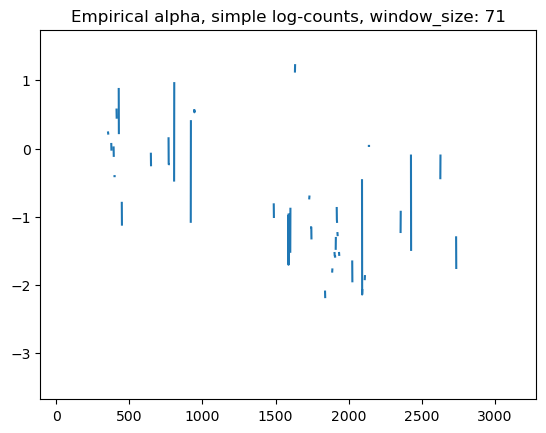

Text(0.5, 1.0, 'Empirical alpha, simple log-counts, window_size: 71, smoothed average with window_size 100')

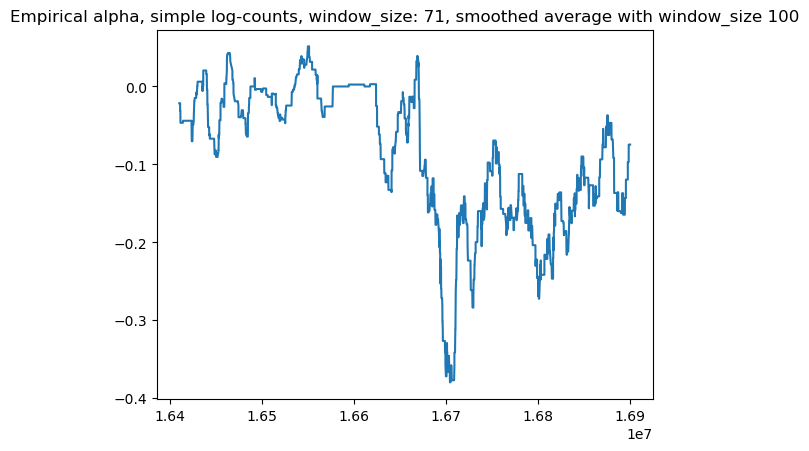

In [18]:
snp_window_size = 71    
snp_slides = sliding_window_view(full_vcf_gts_filtered, window_shape=(snp_window_size, full_vcf_gts_filtered.shape[1]))
pos_slides = sliding_window_view(full_vcf_pos_filtered, window_shape=(snp_window_size))

empirical_results = []
for i in range(len(snp_slides)):
    snp_window = snp_slides[i][0]
    pos_window = pos_slides[i]
    result = sample_scct(snp_window, central_snp=None, theoretical=False, is_phased = False, use_log_ratio=True, gts_pos=pos_window, full_vcf_gts=full_vcf_gts_filtered, full_vcf_pos=full_vcf_pos_filtered, simple_log_ratio=True, set_alpha_1=False)   
    empirical_results.append(result)
	
	
plt.plot(empirical_results)
plt.title(f"Empirical alpha, simple log-counts, window_size: {snp_window_size}")
plt.show()

smooth_window_size = 100
smoothed_empirical = smooth_average(empirical_results, window_size=smooth_window_size)
plt.plot(full_vcf_pos_filtered[snp_window_size-1:], smoothed_empirical)
plt.title(f"Empirical alpha, simple log-counts, window_size: {snp_window_size}, smoothed average with window_size {smooth_window_size}")